In [1]:
import sys
sys.path.append("../..")


from experiments.plt_pab_fae import plt_fab_fae
from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.BB84TrainableProtocol import BB84TrainableProtocol
from protocol.connection_elements.Layer import SeparableLayer, EntangledLayer
from protocol.BB84Protocol import BB84Protocol
from protocol.connection_elements.MultiQubitQCLEve import MultiQubitQCLEve


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


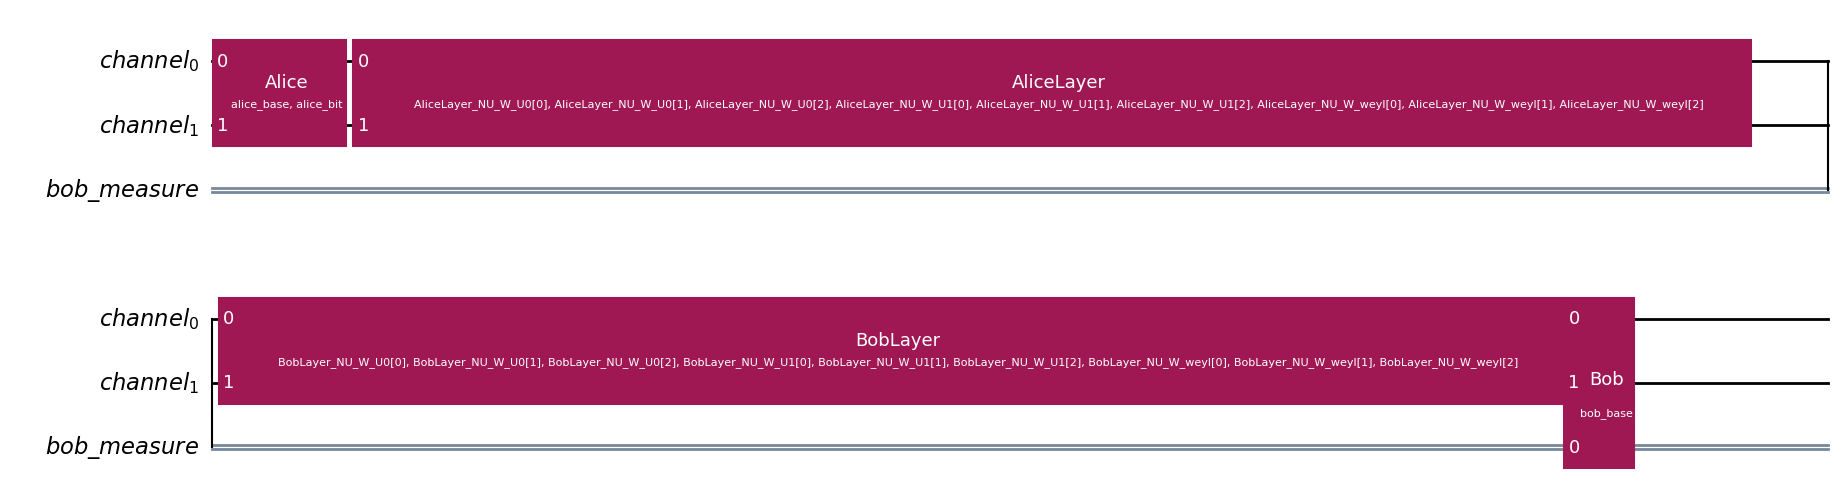

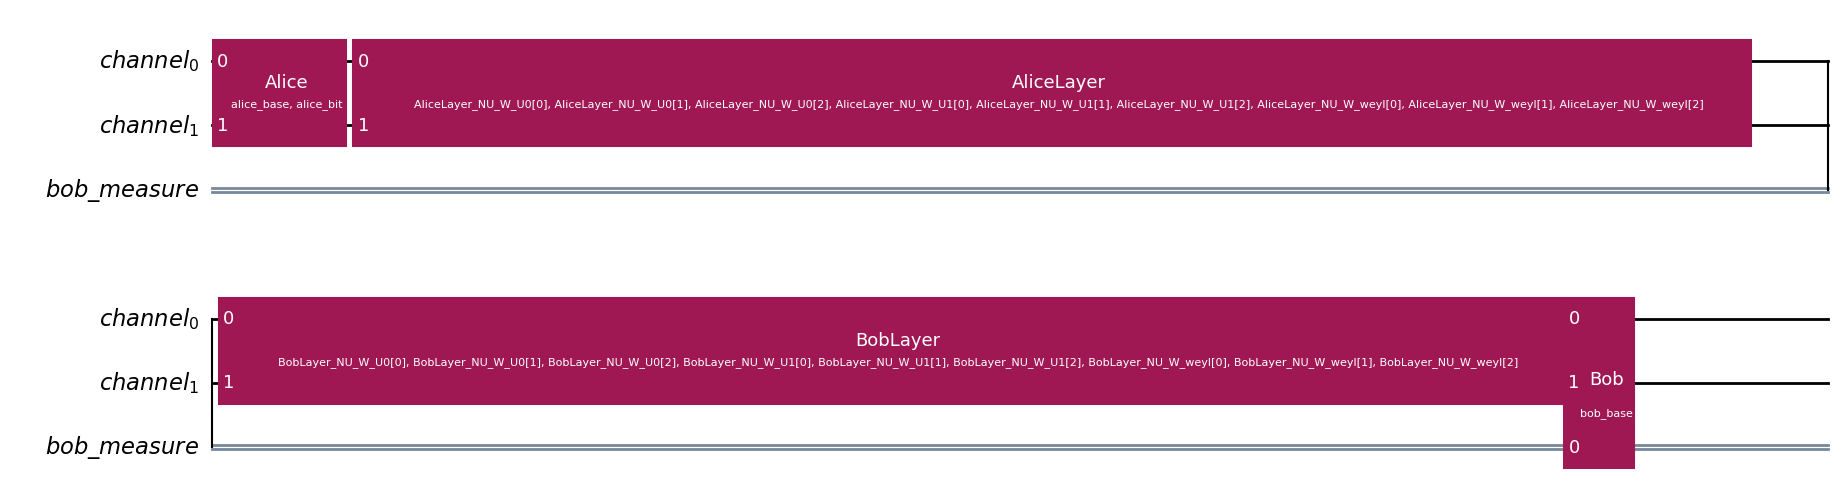

In [2]:
layers = [EntangledLayer("AliceLayer"), EntangledLayer("BobLayer")]
eve = MultiQubitQCLEve()

ab_protocol = BB84TrainableProtocol(n_bits=512, elements=layers, channel_size=2, seed=0, learning_rate=0.1)
eve_protocol = BB84EveTrainableProtocol(n_bits=512, elements=[layers[0], eve, layers[1]], channel_size=2,
                                        seed=0, alpha=1)

qc, _ = ab_protocol.qc_with_ctx()
qc.draw("mpl", expr_len=3)

In [3]:
def train_eve():
    bob_qber, eve_qber = [], []
    qber = eve_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(qber['eve_qber'])
    print(f'start QBER: {qber}')
    for epoch in range(50):
        loss = eve_protocol.train()
        qber = eve_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(qber['eve_qber'])
        if epoch % 5 == 0 or epoch == 49:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

def train_ab():
    bob_qber, eve_qber = [], []
    qber = ab_protocol.run()
    bob_qber.append(qber['bob_qber'])
    eve_qber.append(0.5)
    print(f'start QBER: {qber}')
    for epoch in range(20):
        loss = ab_protocol.train()
        qber = ab_protocol.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(0.5)
        if epoch % 5 == 0 or epoch == 19:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')
    return bob_qber, eve_qber

# Krok 1 - trenowanie Alice i Boba do początkowego stanu
Uczymy Alice i Boba bez Eve, aby miały sensowne parametry początkowe i potrafiły przekazywać sobie dane.

In [4]:
b_q, e_q = train_ab()

start QBER: {'bob_qber': np.float64(0.2579365079365079)}
epoch: 0, loss: -0.7560958862304688, QBER: {'bob_qber': np.float64(0.1785714285714286)}
epoch: 5, loss: -0.9930380582809448, QBER: {'bob_qber': np.float64(0.011904761904761862)}
epoch: 10, loss: -0.973186731338501, QBER: {'bob_qber': np.float64(0.03968253968253965)}
epoch: 15, loss: -0.9855098724365234, QBER: {'bob_qber': np.float64(0.015873015873015928)}
epoch: 19, loss: -0.9980468153953552, QBER: {'bob_qber': np.float64(0.007936507936507908)}


<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

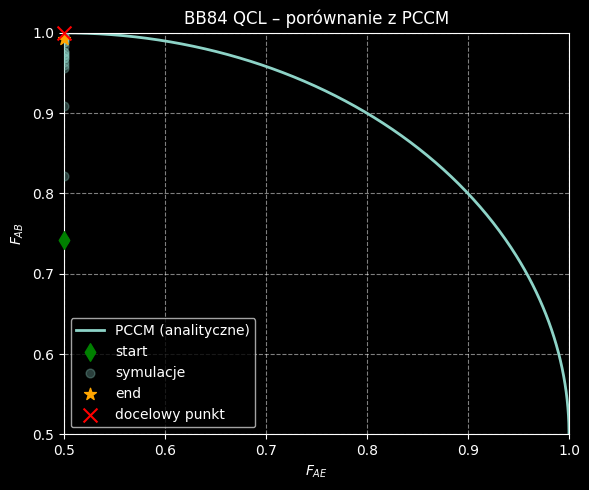

In [5]:
plt_fab_fae(b_q, e_q, 1)

# Krok 2 - trenowanie tylko Eve, warstwy Alice i Boba zamrożone
Uczymy samą Eve, docelowa dokładność Boba to 0.8. Startujemy od parametrów Alice i Boba wytrenowanych w poprzednim kroku i Eve jako identyczność.

In [6]:
eve_protocol.set_parameters(ab_protocol.get_all_parameters())

params = eve_protocol.get_all_parameters()
for p in eve.nu.params():
    k = p.name
    params[k] = 0

eve_protocol.set_parameters(params)
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(0.0), 'NU_W_0_0_U0[1]': np.float32(0.0), 'NU_W_0_0_U0[2]': np.float32(0.0), 'NU_W_0_0_U1[0]': np.float32(0.0), 'NU_W_0_0_U1[1]': np.float32(0.0), 'NU_W_0_0_U1[2]': np.float32(0.0), 'NU_W_0_0_weyl[0]': np.float32(0.0), 'NU_W_0_0_weyl[1]': np.float32(0.0), 'NU_W_0_0_weyl[2]': np.float32(0.0), 'NU_W_0_1_U0[0]': np.float32(0.0), 'NU_W_0_1_U0[1]': np.float32(0.0), 'NU_W_0_1_U0[2]': np.float32(0.0), 'NU_W_0_1_U1[0]': np.float32(0.0), 'NU_W_0_1_U1[1]': np.float32(0.0), 'NU_W_0_1_U1[2]': np.float32(0.0), 'NU_W_0_1_weyl[0]': np.float32(0.0), 'NU_W_0_1_weyl[1]': np.float32(0.0), 'NU_W_0_1_weyl[2]': np.float32(0.0), 'NU_W_1_0_U0[0]': np.float32(0.0), 'NU_W_1_0_U0[1]': np.float32(0.0), 'NU_W_1_0_U0[2]': np.float32(0.0), 'NU_W_1_0_U1[0]': np.float32(0.0), 'NU_W_1_0_U1[1]': np.float32(0.0), 'NU_W_1_0_U1[2]': np.float32(0.0), 'NU_W_1_0_weyl[0]': np.float32(0.0), 'NU_W_1_0_weyl[1]': np.float32(0.0), 'NU_W_1_0_weyl[2]': np.float32(0.0), 'NU_W_2_0_U0[0

In [7]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss4
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.003676470588235281), 'eve_qber': np.float64(0.5294117647058824)}
epoch: 0, loss: -1.297245979309082, QBER: {'bob_qber': np.float64(0.003676470588235281), 'eve_qber': np.float64(0.5294117647058824)}
epoch: 5, loss: -1.4229849576950073, QBER: {'bob_qber': np.float64(0.2536764705882353), 'eve_qber': np.float64(0.2977941176470589)}
epoch: 10, loss: -1.493752360343933, QBER: {'bob_qber': np.float64(0.1470588235294118), 'eve_qber': np.float64(0.2867647058823529)}
epoch: 15, loss: -1.6001012325286865, QBER: {'bob_qber': np.float64(0.19117647058823528), 'eve_qber': np.float64(0.20588235294117652)}
epoch: 20, loss: -1.6220757961273193, QBER: {'bob_qber': np.float64(0.25), 'eve_qber': np.float64(0.12867647058823528)}
epoch: 25, loss: -1.6509203910827637, QBER: {'bob_qber': np.float64(0.15808823529411764), 'eve_qber': np.float64(0.13602941176470584)}
epoch: 30, loss: -1.6717383861541748, QBER: {'bob_qber': np.float64(0.19117647058823528), 'eve_qber': np.float

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

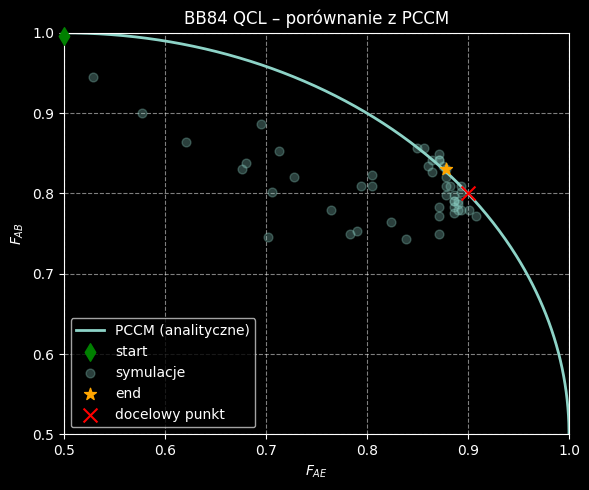

In [8]:
plt_fab_fae(b_q, e_q, 0.8)

# Krok 3 - trenowanie warstw Alice i Boba, Eve zamrożona
Próbujemy uczyć Alice i Boba z użyciem nowej funkcji straty, która maksymalizuje jedynie dokładność Boba.

In [9]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(-0.022873629), 'AliceLayer_NU_W_U0[1]': np.float32(1.0053328), 'AliceLayer_NU_W_U0[2]': np.float32(0.6980951), 'AliceLayer_NU_W_U1[0]': np.float32(0.4746731), 'AliceLayer_NU_W_U1[1]': np.float32(-0.6921884), 'AliceLayer_NU_W_U1[2]': np.float32(0.15747344), 'AliceLayer_NU_W_weyl[0]': np.float32(-0.122918695), 'AliceLayer_NU_W_weyl[1]': np.float32(-0.0031382237), 'AliceLayer_NU_W_weyl[2]': np.float32(0.42317224), 'BobLayer_NU_W_U0[0]': np.float32(-0.44070938), 'BobLayer_NU_W_U0[1]': np.float32(-1.499615), 'BobLayer_NU_W_U0[2]': np.float32(-0.6101071), 'BobLayer_NU_W_U1[0]': np.float32(1.2842183), 'BobLayer_NU_W_U1[1]': np.float32(0.3532626), 'BobLayer_NU_W_U1[2]': np.float32(0.39415726), 'BobLayer_NU_W_weyl[0]': np.float32(0.43676937), 'BobLayer_NU_W_weyl[1]': np.float32(-0.10685952), 'BobLayer_NU_W_weyl[2]': np.float32(-0.31676432)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(-0.261254), 'NU_W_0_0_U0[1]': np.float32(-0.6067

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [10]:
eve_loss = eve_protocol.loss
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.16911764705882348), 'eve_qber': np.float64(0.12132352941176472)}
epoch: 0, loss: -0.8056188821792603, QBER: {'bob_qber': np.float64(0.16911764705882348), 'eve_qber': np.float64(0.15808823529411764)}
epoch: 5, loss: -0.9217163324356079, QBER: {'bob_qber': np.float64(0.0845588235294118), 'eve_qber': np.float64(0.3492647058823529)}
epoch: 10, loss: -0.9303628206253052, QBER: {'bob_qber': np.float64(0.0625), 'eve_qber': np.float64(0.43014705882352944)}
epoch: 15, loss: -0.950343132019043, QBER: {'bob_qber': np.float64(0.0404411764705882), 'eve_qber': np.float64(0.4742647058823529)}
epoch: 20, loss: -0.9557945728302002, QBER: {'bob_qber': np.float64(0.0625), 'eve_qber': np.float64(0.4852941176470589)}
epoch: 25, loss: -0.9596340656280518, QBER: {'bob_qber': np.float64(0.044117647058823484), 'eve_qber': np.float64(0.4779411764705882)}
epoch: 30, loss: -0.9676247239112854, QBER: {'bob_qber': np.float64(0.05514705882352944), 'eve_qber': np.float64(0.448529

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

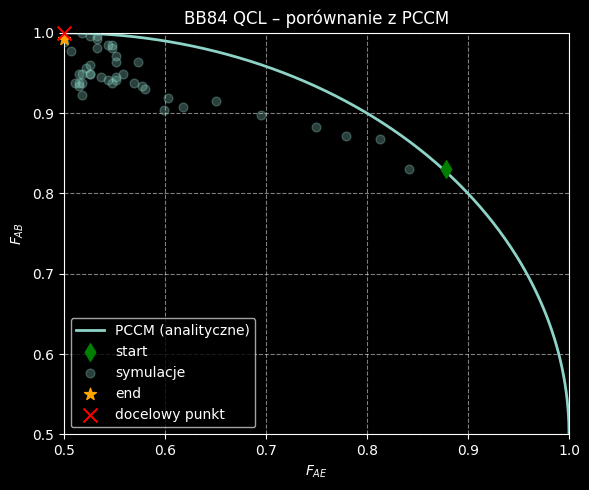

In [11]:
plt_fab_fae(b_q, e_q, 1)

In [12]:
eve_protocol.freeze_elements(layers)
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'NU_W_0_0_U0[0]': np.float32(-0.261254), 'NU_W_0_0_U0[1]': np.float32(-0.60677415), 'NU_W_0_0_U0[2]': np.float32(-0.19092062), 'NU_W_0_0_U1[0]': np.float32(0.75546795), 'NU_W_0_0_U1[1]': np.float32(0.27558413), 'NU_W_0_0_U1[2]': np.float32(0.50996935), 'NU_W_0_0_weyl[0]': np.float32(0.030153377), 'NU_W_0_0_weyl[1]': np.float32(0.77648145), 'NU_W_0_0_weyl[2]': np.float32(0.8189773), 'NU_W_0_1_U0[0]': np.float32(0.043113653), 'NU_W_0_1_U0[1]': np.float32(-1.1191281), 'NU_W_0_1_U0[2]': np.float32(-1.9586717e-10), 'NU_W_0_1_U1[0]': np.float32(-0.6401428), 'NU_W_0_1_U1[1]': np.float32(-0.049418543), 'NU_W_0_1_U1[2]': np.float32(-7.1691386e-10), 'NU_W_0_1_weyl[0]': np.float32(0.08532682), 'NU_W_0_1_weyl[1]': np.float32(0.096551314), 'NU_W_0_1_weyl[2]': np.float32(-1.007232), 'NU_W_1_0_U0[0]': np.float32(-0.4819108), 'NU_W_1_0_U0[1]': np.float32(1.077681), 'NU_W_1_0_U0[2]': np.float32(-0.06397442), 'NU_W_1_0_U1[0]': np.float32(-0.22948366), 'NU_W_1_0_U1[1]': np.float32(

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [13]:
eve_protocol.f_value = 0.8
eve_protocol.loss = eve_protocol.loss4
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.007352941176470562), 'eve_qber': np.float64(0.5404411764705883)}
epoch: 0, loss: -1.2866621017456055, QBER: {'bob_qber': np.float64(0.0404411764705882), 'eve_qber': np.float64(0.42647058823529416)}
epoch: 5, loss: -1.6189779043197632, QBER: {'bob_qber': np.float64(0.25), 'eve_qber': np.float64(0.18014705882352944)}
epoch: 10, loss: -1.5964107513427734, QBER: {'bob_qber': np.float64(0.16911764705882348), 'eve_qber': np.float64(0.21323529411764708)}
epoch: 15, loss: -1.6247961521148682, QBER: {'bob_qber': np.float64(0.19485294117647056), 'eve_qber': np.float64(0.17279411764705888)}
epoch: 20, loss: -1.6247425079345703, QBER: {'bob_qber': np.float64(0.2095588235294118), 'eve_qber': np.float64(0.16911764705882348)}
epoch: 25, loss: -1.644761085510254, QBER: {'bob_qber': np.float64(0.19485294117647056), 'eve_qber': np.float64(0.15441176470588236)}
epoch: 30, loss: -1.6571452617645264, QBER: {'bob_qber': np.float64(0.21323529411764708), 'eve_qber': np.fl

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

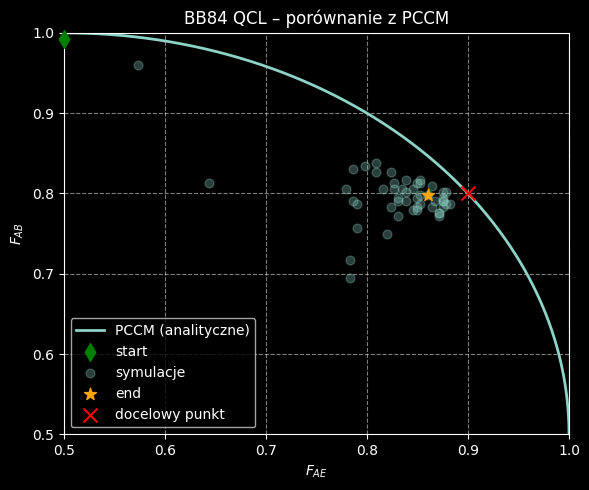

In [14]:
plt_fab_fae(b_q, e_q, 0.8)

In [15]:
eve_protocol.freeze_elements([eve])
print("Trainable parameters:", eve_protocol.get_unfrozen_parameters())
print("Frozen parameters:", eve_protocol.get_frozen_params())

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Trainable parameters: {'AliceLayer_NU_W_U0[0]': np.float32(-1.0293543), 'AliceLayer_NU_W_U0[1]': np.float32(0.8352927), 'AliceLayer_NU_W_U0[2]': np.float32(0.5777064), 'AliceLayer_NU_W_U1[0]': np.float32(-1.9785585), 'AliceLayer_NU_W_U1[1]': np.float32(-0.8503231), 'AliceLayer_NU_W_U1[2]': np.float32(0.15747344), 'AliceLayer_NU_W_weyl[0]': np.float32(0.94081235), 'AliceLayer_NU_W_weyl[1]': np.float32(-0.9607534), 'AliceLayer_NU_W_weyl[2]': np.float32(-0.79711413), 'BobLayer_NU_W_U0[0]': np.float32(1.1827998), 'BobLayer_NU_W_U0[1]': np.float32(-1.6865094), 'BobLayer_NU_W_U0[2]': np.float32(-0.68684036), 'BobLayer_NU_W_U1[0]': np.float32(1.3642067), 'BobLayer_NU_W_U1[1]': np.float32(-0.50061435), 'BobLayer_NU_W_U1[2]': np.float32(-1.0822399), 'BobLayer_NU_W_weyl[0]': np.float32(0.10772321), 'BobLayer_NU_W_weyl[1]': np.float32(-0.064459346), 'BobLayer_NU_W_weyl[2]': np.float32(0.031934112)}
Frozen parameters: {'NU_W_0_0_U0[0]': np.float32(-0.56915486), 'NU_W_0_0_U0[1]': np.float32(-0.4282

/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/qiskit_machine_learning/connectors/torch_connector.py:378: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self._weights.data = torch.tensor(initial_weights, dtype=torch.float)


In [16]:
eve_protocol.loss = ab_protocol.loss
b_q, e_q = train_eve()

start QBER: {'bob_qber': np.float64(0.20220588235294112), 'eve_qber': np.float64(0.13970588235294112)}
epoch: 0, loss: -0.8134645819664001, QBER: {'bob_qber': np.float64(0.16176470588235292), 'eve_qber': np.float64(0.17647058823529416)}
epoch: 5, loss: -0.9493348598480225, QBER: {'bob_qber': np.float64(0.0404411764705882), 'eve_qber': np.float64(0.3897058823529411)}
epoch: 10, loss: -0.9611362218856812, QBER: {'bob_qber': np.float64(0.044117647058823484), 'eve_qber': np.float64(0.4595588235294118)}
epoch: 15, loss: -0.9574621915817261, QBER: {'bob_qber': np.float64(0.05147058823529416), 'eve_qber': np.float64(0.4742647058823529)}
epoch: 20, loss: -0.9631049633026123, QBER: {'bob_qber': np.float64(0.0404411764705882), 'eve_qber': np.float64(0.4558823529411765)}
epoch: 25, loss: -0.9723312854766846, QBER: {'bob_qber': np.float64(0.047794117647058876), 'eve_qber': np.float64(0.4154411764705882)}
epoch: 30, loss: -0.9776818752288818, QBER: {'bob_qber': np.float64(0.02941176470588236), 'eve

<module 'matplotlib.pyplot' from '/home/pcfeng3/PycharmProjects/BB84-QCL-error-correction/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

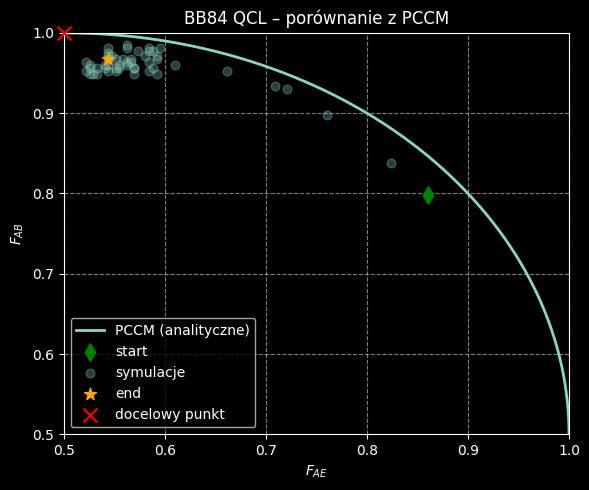

In [17]:
plt_fab_fae(b_q, e_q, 1)

In [18]:
print("All parameters:", eve_protocol.get_all_parameters())

All parameters: {'NU_W_0_0_U0[0]': np.float32(-0.56915486), 'NU_W_0_0_U0[1]': np.float32(-0.42822576), 'NU_W_0_0_U0[2]': np.float32(-0.43440312), 'NU_W_0_0_U1[0]': np.float32(1.0857342), 'NU_W_0_0_U1[1]': np.float32(-0.7220214), 'NU_W_0_0_U1[2]': np.float32(-0.63927877), 'NU_W_0_0_weyl[0]': np.float32(0.45552775), 'NU_W_0_0_weyl[1]': np.float32(0.28109515), 'NU_W_0_0_weyl[2]': np.float32(0.3445955), 'NU_W_0_1_U0[0]': np.float32(0.032224838), 'NU_W_0_1_U0[1]': np.float32(-0.7927441), 'NU_W_0_1_U0[2]': np.float32(-4.7346815e-10), 'NU_W_0_1_U1[0]': np.float32(-2.0696082), 'NU_W_0_1_U1[1]': np.float32(-0.41839102), 'NU_W_0_1_U1[2]': np.float32(-7.1691386e-10), 'NU_W_0_1_weyl[0]': np.float32(0.040713113), 'NU_W_0_1_weyl[1]': np.float32(-0.06936731), 'NU_W_0_1_weyl[2]': np.float32(-1.6052046), 'NU_W_1_0_U0[0]': np.float32(-0.5413399), 'NU_W_1_0_U0[1]': np.float32(1.5289364), 'NU_W_1_0_U0[2]': np.float32(0.0470656), 'NU_W_1_0_U1[0]': np.float32(-0.64964765), 'NU_W_1_0_U1[1]': np.float32(-0.12

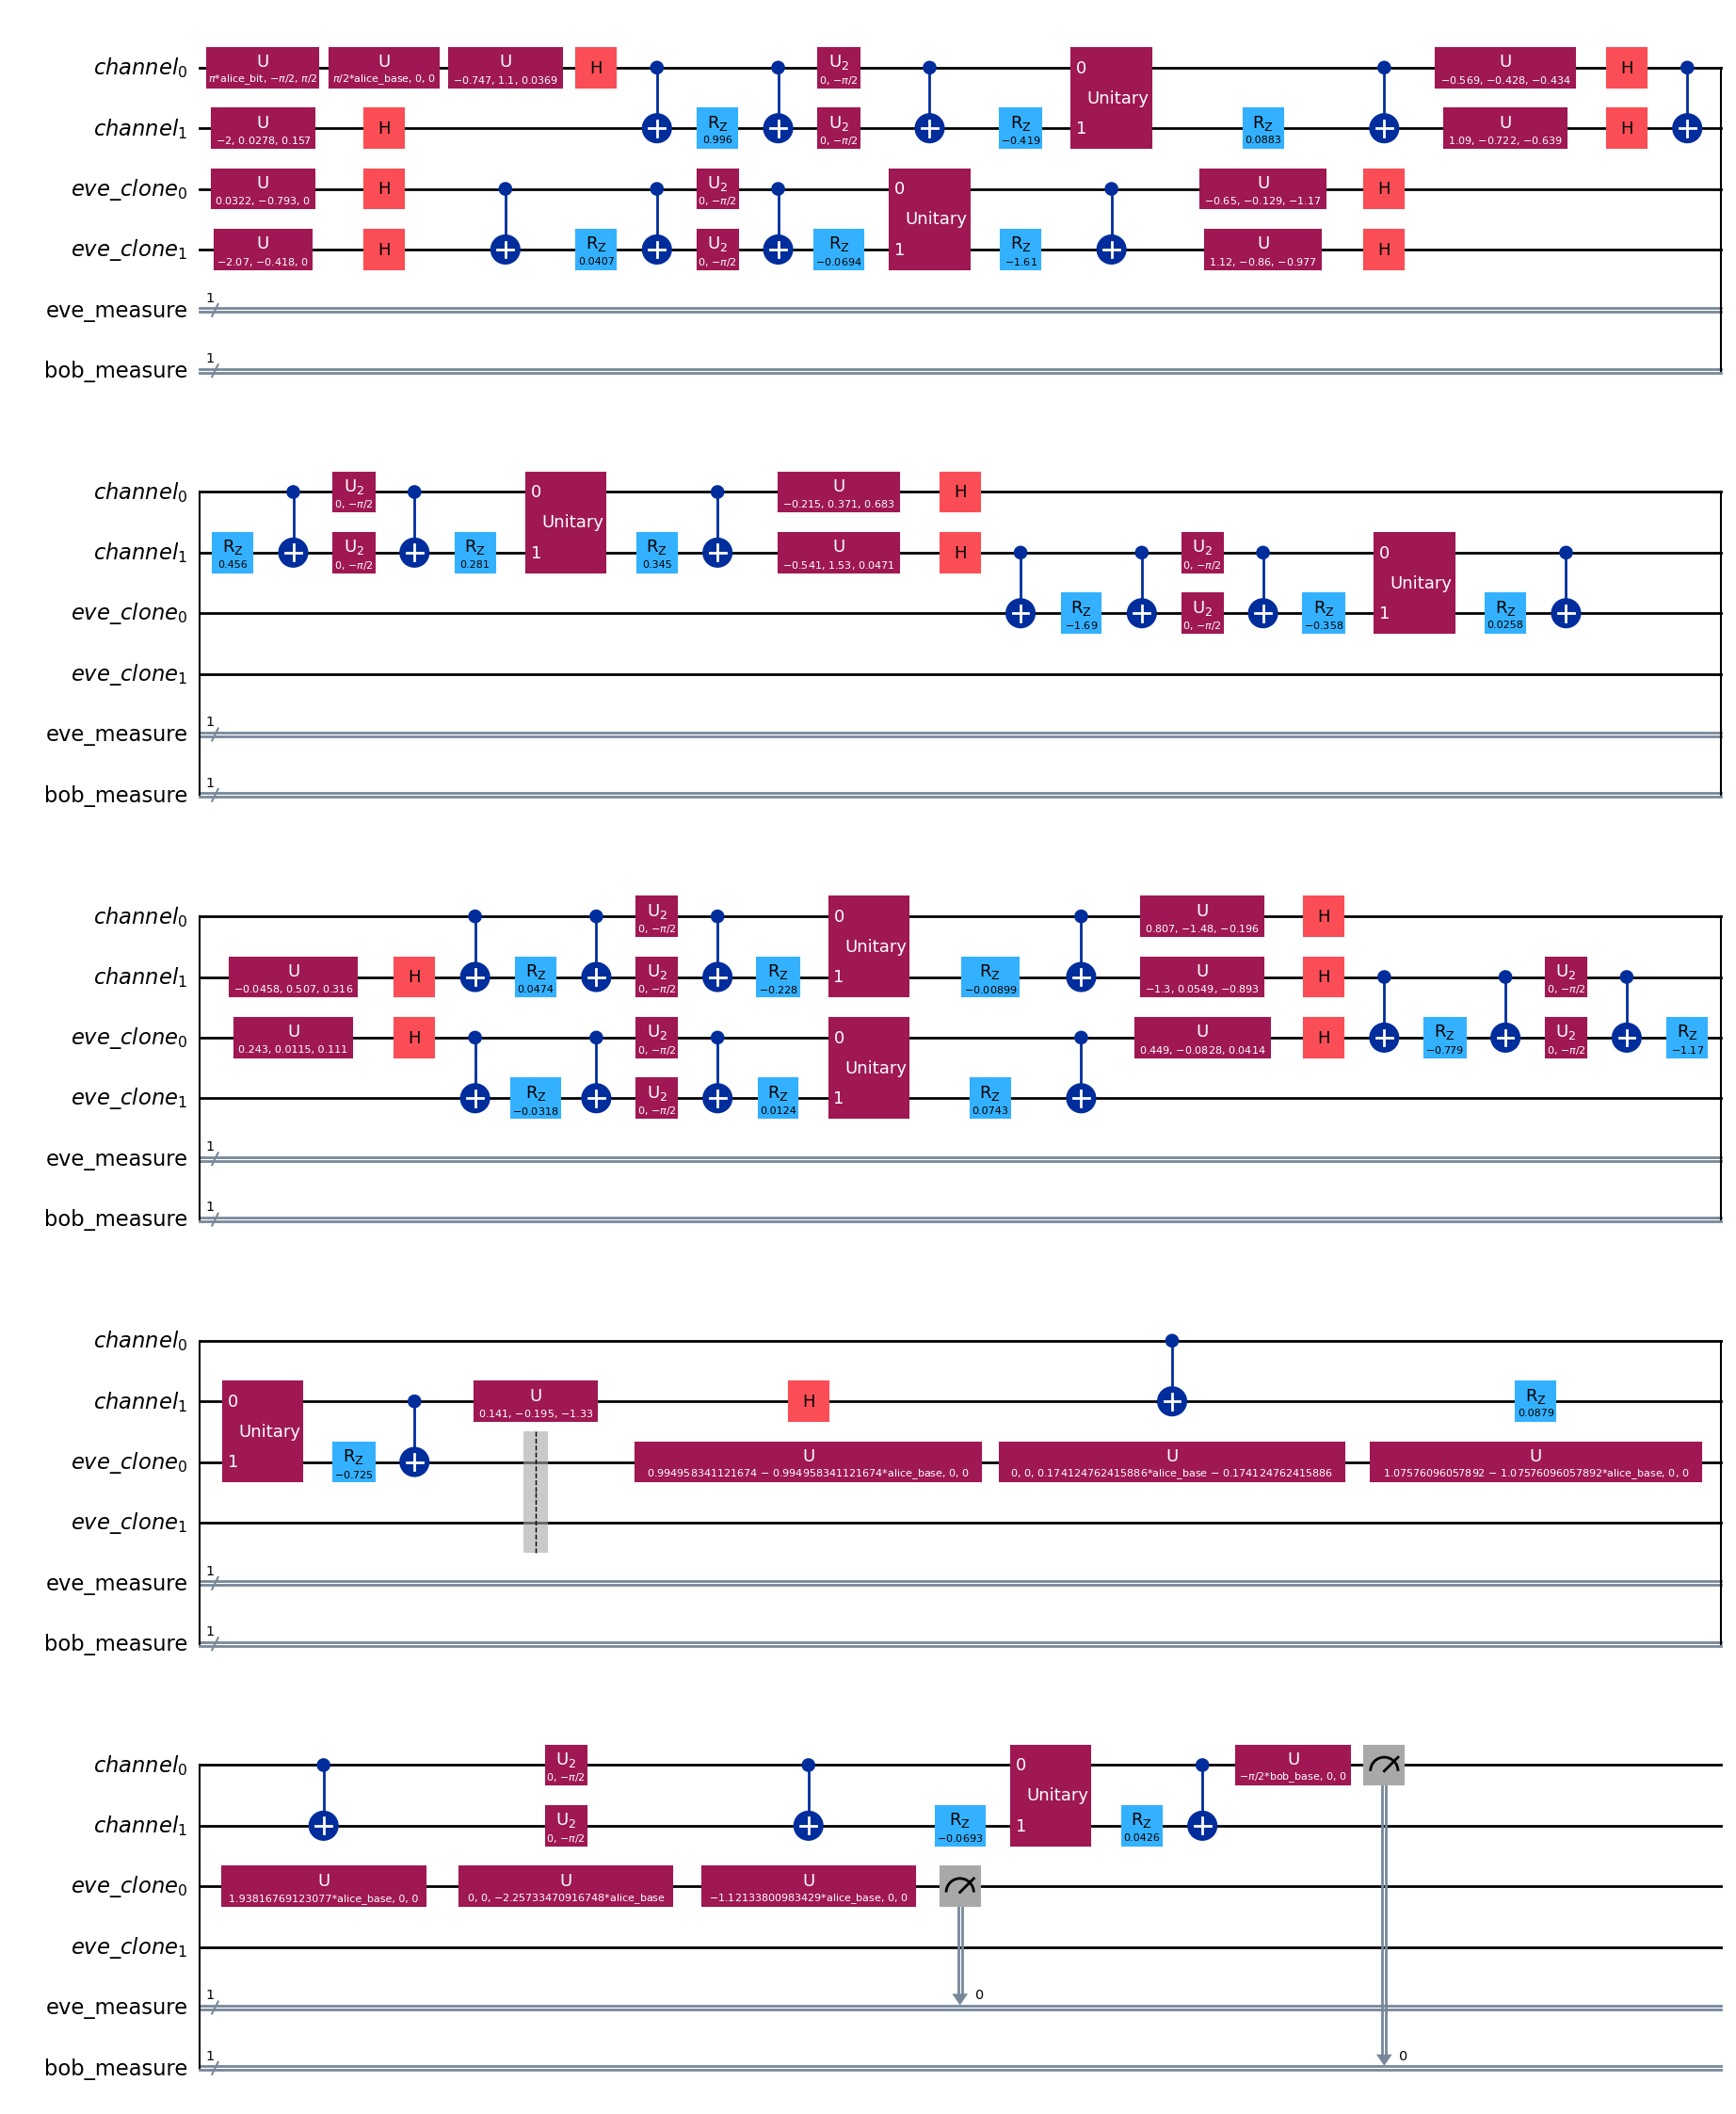

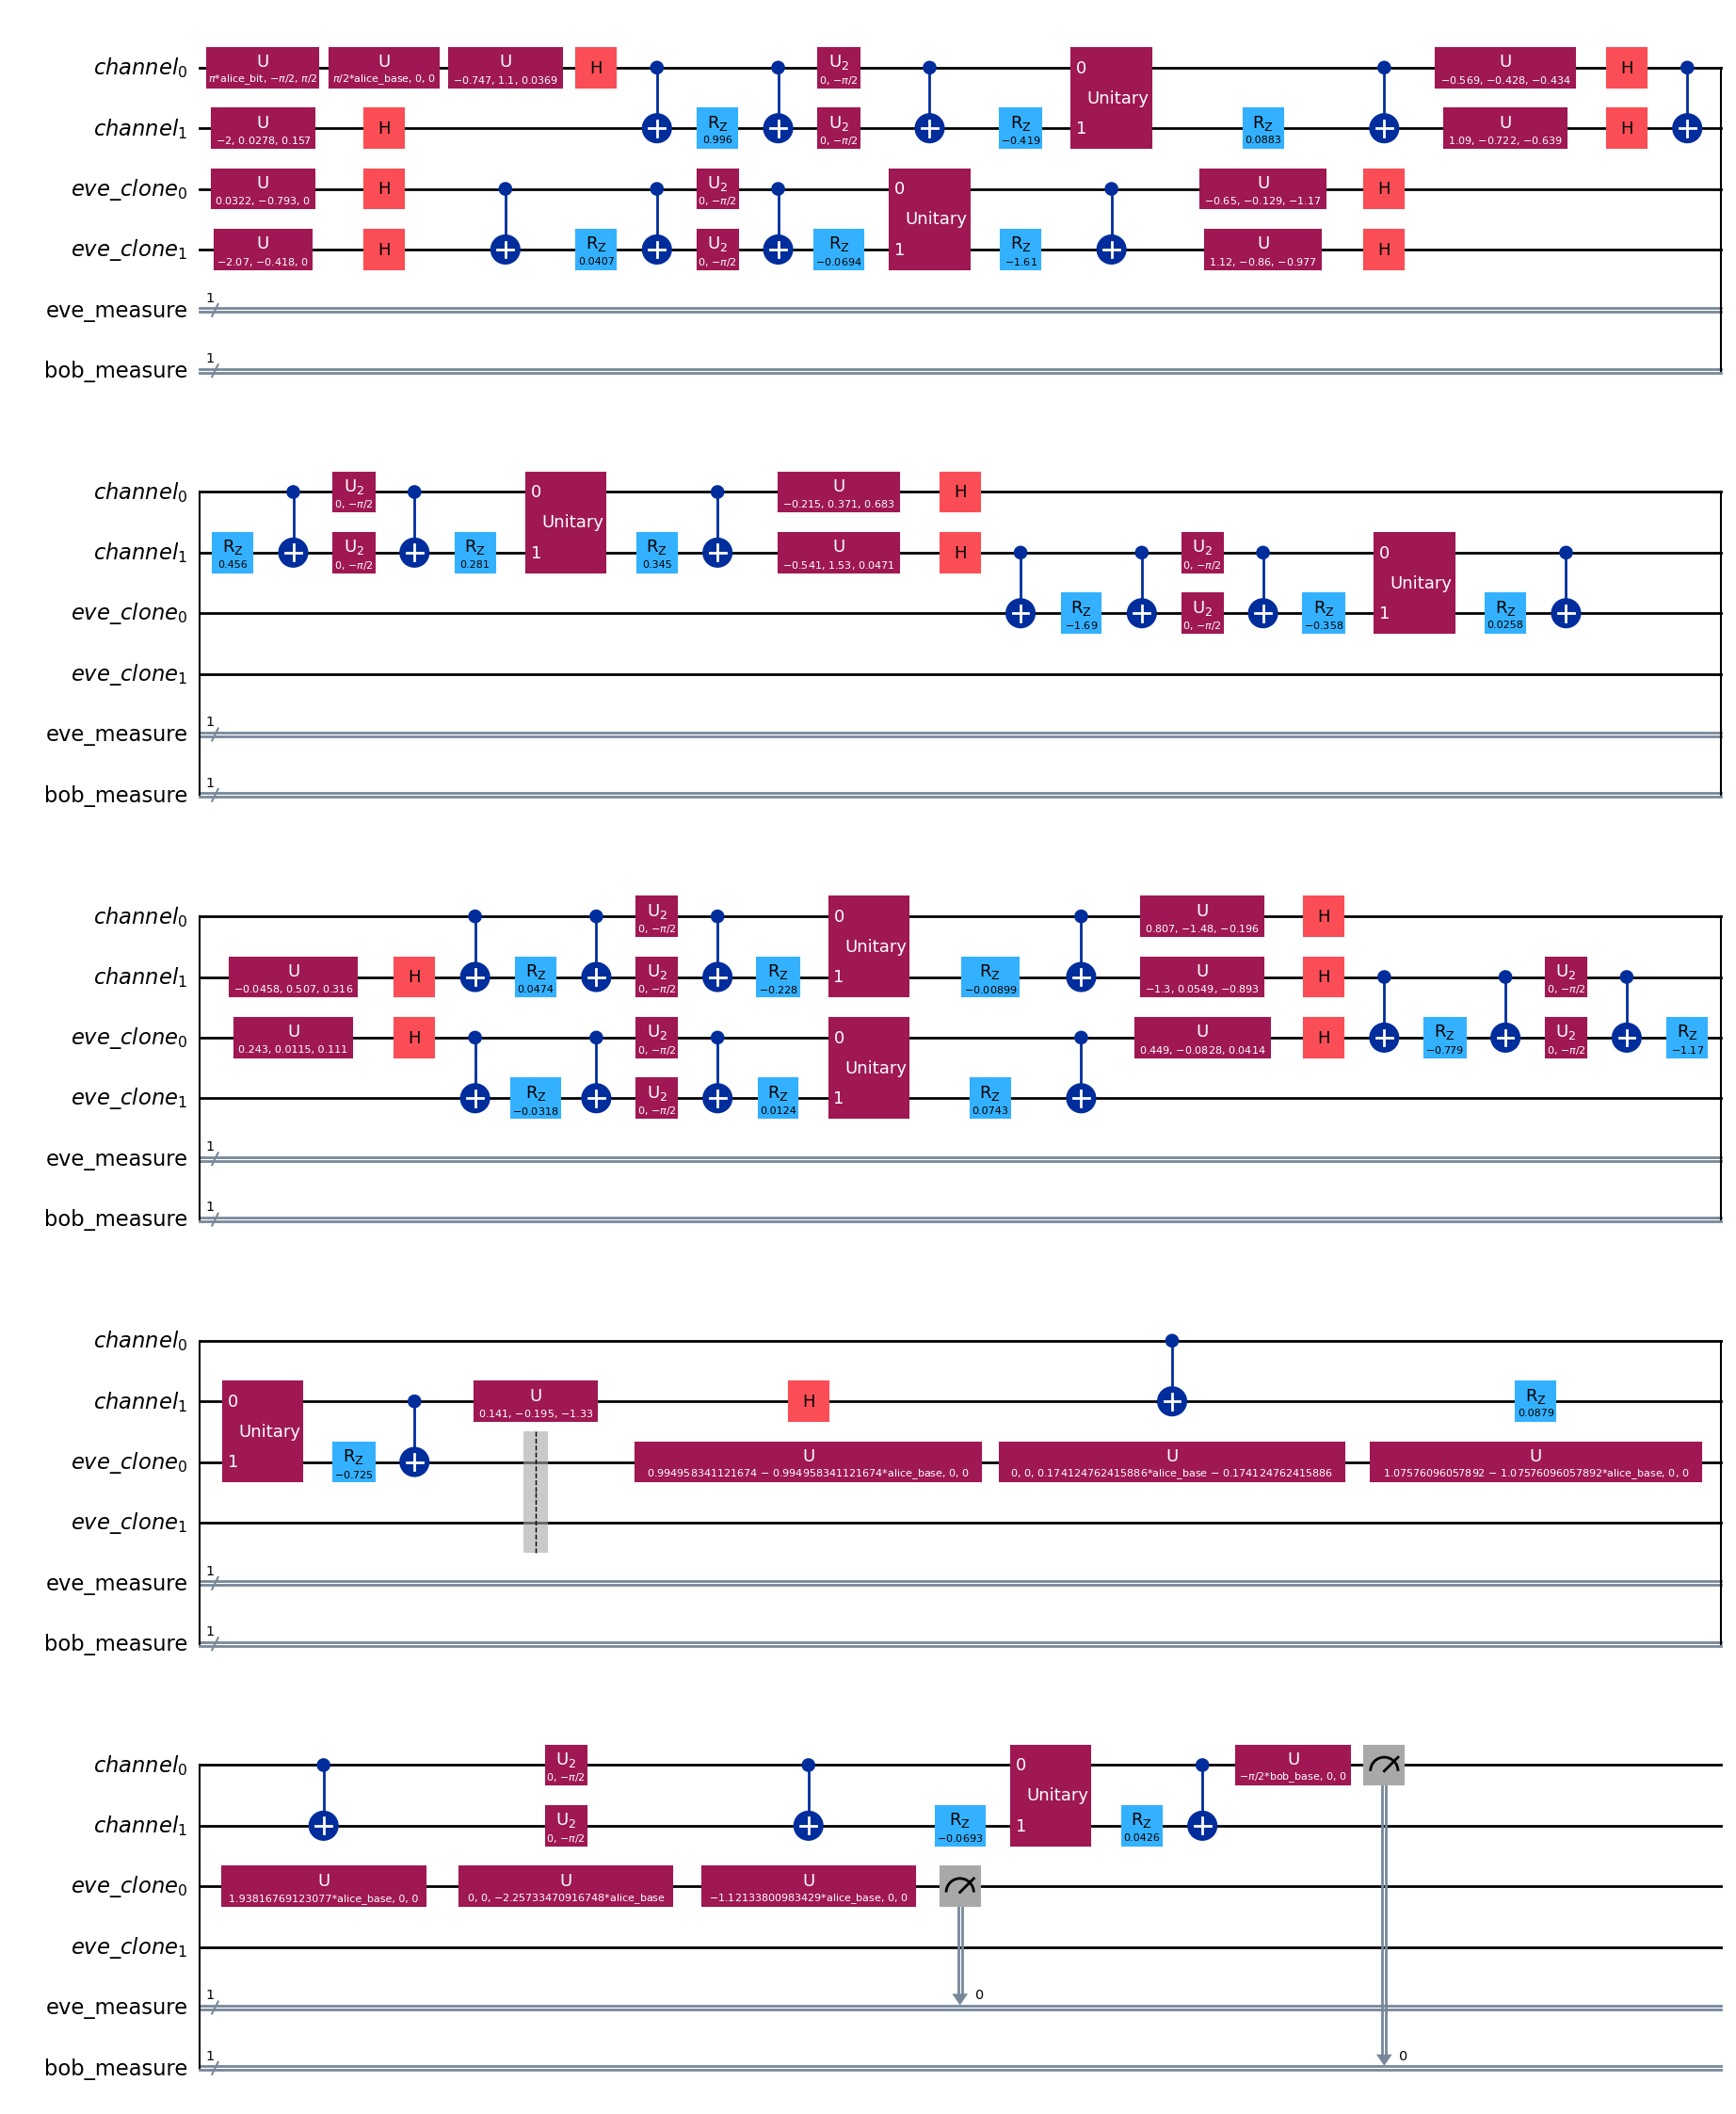

In [19]:
eve_protocol._qc.assign_parameters(eve_protocol.get_all_parameters()).draw("mpl")